# Wine Review Analysis

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
column_names = ["Index", "Country", "Description", "Designation", "Points", "Price", 
             "Province", "Region_1", "Region_2", "Variety", "Winery"]

In [76]:
df=pd.read_csv("winemag-data.csv")

In [77]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [78]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [80]:
df.isnull().any()

country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [81]:
df.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [82]:
df[df.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [83]:
df.shape

(150930, 10)

In [84]:
df =df.dropna(how="any", subset=["country"])

In [85]:
df.shape

(150925, 10)

In [86]:
df[df.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [87]:
# Calculate the percentage of remaining records if missing prices are dropped:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))

Missing prices: 13695
Total records: 150925
Percentage remaining: 90.93%


In [88]:
df.shape

(150925, 10)

In [89]:
df = df.dropna(how="any", subset=["price"])

In [90]:
df.shape

(137230, 10)

In [91]:
null_val = df[df.isnull().any(axis=1)].shape
print("Records without null values:\n(rows, columns)\t {}".format(null_val))

Records without null values:
(rows, columns)	 (97989, 10)


In [92]:
complete_rows = int(null_val[0])
total_rows = len(df)
completion_ratio = ((complete_rows / total_rows) * 100)

print("Total complete records: \t\t{}".format(complete_rows) +
      "\nTotal records: \t\t\t\t{}".format(total_rows) +
      "\nCompletion ratio: \t\t\t{:.2f}%".format(completion_ratio))

Total complete records: 		97989
Total records: 				137230
Completion ratio: 			71.40%


In [93]:
df.describe()

,points,price
count,137230.000000,137230.000000
mean,87.788035,33.132019
std,3.221572,36.323072
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [94]:
df.describe(include='object').T

,count,unique,top,freq
country,137230,46,US,62139
description,137230,89105,"Powerful in Zinny character, this blend of Dry...",6
designation,94919,28343,Reserve,2704
province,137230,446,California,44356
region_1,114393,1197,Napa Valley,6191
region_2,60704,18,Central Coast,12987
variety,137230,619,Chardonnay,13775
winery,137230,13851,Williams Selyem,371


In [95]:
df.std()

C:\Users\sivar\AppData\Local\Temp\ipykernel_14208\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


points     3.221572
price     36.323072
dtype: float64

In [96]:
df.var()

C:\Users\sivar\AppData\Local\Temp\ipykernel_14208\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


points      10.378523
price     1319.365551
dtype: float64

In [97]:
# Total amount of Countries featured in the reviews:
total_countries = df["country"].unique()
print("Number of Countries reviewed: {}".format(len(total_countries)))

Number of Countries reviewed: 46


In [98]:
# The unique countries in the reviews:
unique_countries = df["country"].unique()
print("Total amount of unique countries: {}".format(len(unique_countries)))
print(unique_countries)

Total amount of unique countries: 46
['US' 'Spain' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic'
 'US-France']


In [99]:
# Total wine reviews per country (Top 25)
review_totals_by_country = df["country"].value_counts().head(25)
print("Total amount of Reviews submitted for each country: \n")
print(review_totals_by_country)

Total amount of Reviews submitted for each country: 

US              62139
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Greece            872
Israel            610
Hungary           230
Canada            194
Romania           139
Uruguay            85
Croatia            83
Slovenia           81
Bulgaria           77
Moldova            71
Mexico             63
Turkey             50
Georgia            43
Name: country, dtype: int64


In [100]:
# Group country by the most common Variety reviewed (first ten).
df.groupby("country").variety.max().head(10)

country
Albania                       Kallmet
Argentina                 White Blend
Australia                   Zinfandel
Austria                      Zweigelt
Bosnia and Herzegovina         Vranec
Brazil                         Tannat
Bulgaria                  White Blend
Canada                    White Blend
Chile                     White Blend
China                     White Blend
Name: variety, dtype: object

In [101]:
# Group points per country - count, min, max points:
df.groupby(['country']).points.agg([len, min, max])

,len,min,max
country,,,
Albania,2,88,88
Argentina,5587,80,97
Australia,4894,80,100
Austria,2483,81,98
Bosnia and Herzegovina,4,83,88
Brazil,25,81,88
Bulgaria,77,80,90
Canada,194,82,93
Chile,5766,80,95


In [102]:
# Sum Reviews per Country + Region
df.country + " - " + df.region_1

0                  US - Napa Valley
1                      Spain - Toro
2               US - Knights Valley
3            US - Willamette Valley
4                   France - Bandol
                    ...            
150925    Italy - Fiano di Avellino
150926           France - Champagne
150927    Italy - Fiano di Avellino
150928           France - Champagne
150929           Italy - Alto Adige
Length: 137230, dtype: object

In [103]:
# The most expensive wine
max_price =df['price'].max()
print("The most expensive wine in all the reviews cost ${:.2f}".format(max_price))

The most expensive wine in all the reviews cost $2300.00


In [104]:
# reviews_df.groupby("Variety").Price.max()
df[df['price'] == 2300]


,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour


In [105]:
# The average wine cost
avg_price = df['price'].mean()
print("The average bottle in the reviews cost ${:.2f} USD".format(avg_price))

The average bottle in the reviews cost $33.13 USD


In [106]:
# The cheapest wine cost
min_price = df['price'].min()
print("The cheapest bottle in the reviews cost ${:.2f} USD".format(min_price))

The cheapest bottle in the reviews cost $4.00 USD


In [107]:
# The cheapest wines
df[df['price'] == 4.0]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal
34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Tempranillo,Terrenal
36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass
48655,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas
80185,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
90546,Argentina,Clean as anyone should reasonably expect given...,NaN,85,4.0,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte
91766,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass


In [108]:
df.points.describe()


count    137230.000000
mean         87.788035
std           3.221572
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [109]:
# Sum of reviews per variety (Top 25)
df["variety"].value_counts().head(25)

Chardonnay                       13775
Pinot Noir                       13625
Cabernet Sauvignon               12671
Red Blend                         9377
Sauvignon Blanc                   6054
Syrah                             5667
Riesling                          5212
Merlot                            4987
Bordeaux-style Red Blend          4545
Zinfandel                         3794
Malbec                            3085
Sangiovese                        2879
White Blend                       2554
Tempranillo                       2525
Rosé                              2461
Shiraz                            1945
Sparkling Blend                   1820
Portuguese Red                    1812
Nebbiolo                          1529
Rhône-style Red Blend             1455
Cabernet Franc                    1310
Corvina, Rondinella, Molinara     1292
Pinot Gris                        1275
Pinot Grigio                      1270
Viognier                          1255
Name: variety, dtype: int

In [110]:
# Number of unique wine varieties in the reviews:
unique_wines = df["variety"].unique()
print("Unique wine varieties in the reviews: \n{}".format(len(unique_wines)))

Unique wine varieties in the reviews: 
619


In [111]:
# Group country by Variety (first Ten only)
df.groupby("country").variety.max().head(10)

country
Albania                       Kallmet
Argentina                 White Blend
Australia                   Zinfandel
Austria                      Zweigelt
Bosnia and Herzegovina         Vranec
Brazil                         Tannat
Bulgaria                  White Blend
Canada                    White Blend
Chile                     White Blend
China                     White Blend
Name: variety, dtype: object

In [112]:
# Get wine from Argentina~!
# Here are the Top Ten Wines sorted by points~!
argentina_top_ten = df[df['country'].str.match('Argentina')]
argentina_top_ten.sort_values("points", ascending=False).head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
116691,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
121311,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
65331,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
107804,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
63766,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
107806,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
63764,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
83001,Argentina,This wine takes you on a trip to an outer wine...,Gran Corte Las Divas Vineyard,96,50.0,Mendoza Province,Tupungato,NaN,Bordeaux-style Red Blend,Riglos
130756,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
130754,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata


In [113]:
# Create a new dataframe for the perfect scores records:
perfect_scores_df = df[df['points'] == 100]
perfect_scores_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Rutherglen,NaN,Muscat,Chambers Rosewood Vineyards
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
28954,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini
41521,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
78004,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini
83536,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug


In [114]:
# How many records have a score of 100?
perfect_scores_df.shape

(24, 10)

In [115]:
# Count how many perfect scores per country:
perfect_scores_df["country"].value_counts()

US           10
Italy         7
France        4
Australia     3
Name: country, dtype: int64

In [116]:
# Analyze the range in price for perfect score wines by country:
perfect_scores_df.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Australia,3,300.0,300.0
France,4,848.0,1400.0
Italy,7,195.0,460.0
US,10,65.0,245.0


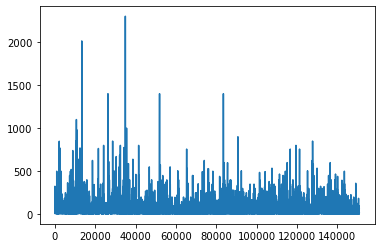

In [117]:
plt.plot(df.index, df["price"])

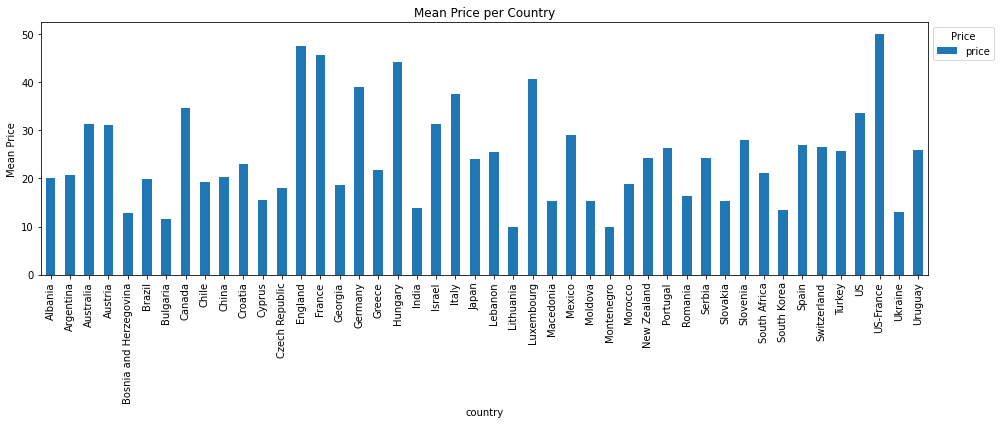

In [118]:
fig, ax = plt.subplots(figsize=(14, 6))

df.groupby(df['country'])['price'].mean().plot.bar()
mean_price = df["price"].mean(0)
df["price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('country')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

<AxesSubplot:>

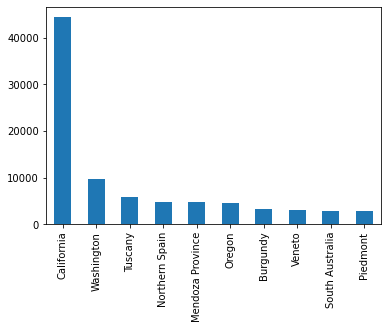

In [119]:
df['province'].value_counts().head(10).plot.bar()

In [120]:
top_province = df['province'].value_counts().head(1)
print("The province with the most reviews is {}".format(top_province))

The province with the most reviews is California    44356
Name: province, dtype: int64


<AxesSubplot:>

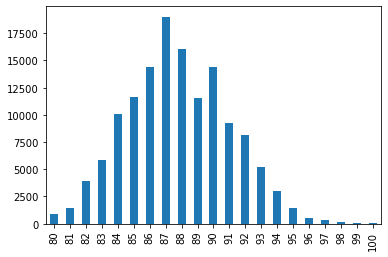

In [121]:
# Bar plot - points/reviews
df['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

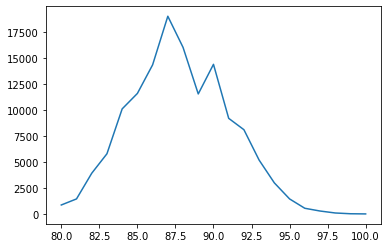

In [122]:
df['points'].value_counts().sort_index().plot.line()

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='count'>

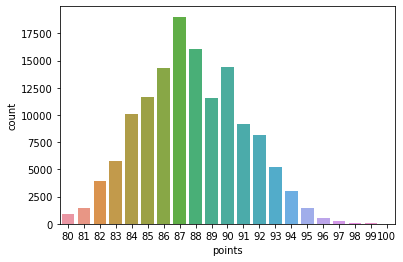

In [123]:
sns.countplot(df['points'])

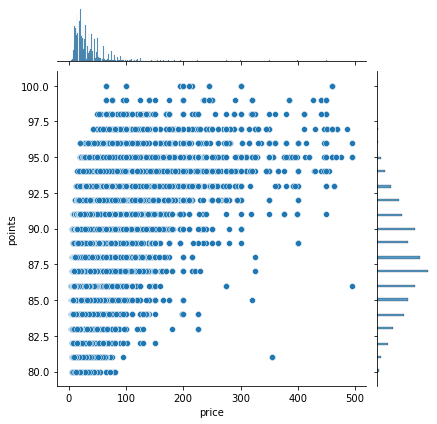

In [124]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 500])

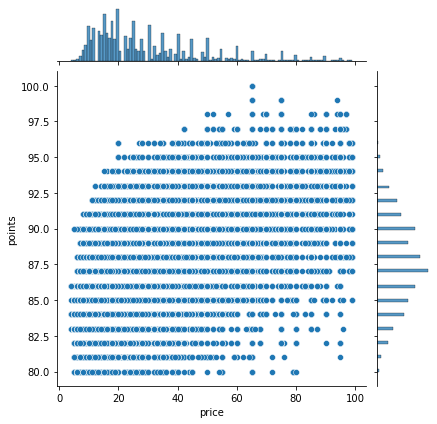

In [125]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 100])

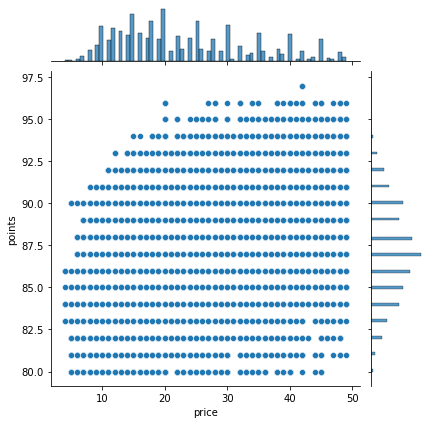

In [126]:

sns.jointplot(x='price', y='points', data=df[df['price'] < 50])

<AxesSubplot:xlabel='price', ylabel='points'>

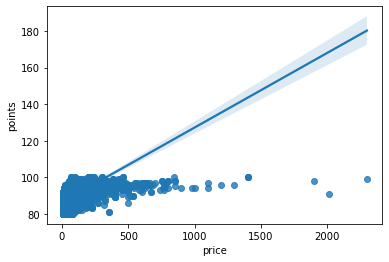

In [127]:
sns.regplot(x="price", y="points", data=df)

In [136]:
cat = ['country', 'description', 'designation', 'province',
       'region_1', 'region_2', 'variety', 'winery']

In [137]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])

df.head(5)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
150904,8,5863,28343,81,10.0,209,1197,18,69,4290
150905,8,66127,19483,80,13.0,209,1197,18,293,4290
150906,14,77432,5362,93,65.0,47,1173,18,394,8845
150907,14,50329,14350,92,52.0,47,1173,18,394,4239
150908,14,13880,1647,90,65.0,47,1173,18,394,8845
150909,14,73084,5326,89,52.0,47,737,18,394,4239
150910,14,52299,28343,89,38.0,47,187,18,394,8845
150911,14,77809,14399,87,37.0,47,737,18,394,8845
150912,14,63003,14418,87,65.0,47,187,18,394,4239
150913,14,35720,28343,94,30.0,324,215,18,422,7903


In [139]:
df_copy=df.copy()

In [151]:
X = df_copy.drop(["points"],axis=1)
y = df_copy["points"]

In [152]:
df_copy.corr()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
country,1.000000,0.027708,0.052235,0.000390,0.001176,-0.238449,-0.037492,-0.667665,0.075436,0.027279
description,0.027708,1.000000,0.005007,0.006560,0.020074,0.036747,-0.021949,-0.030936,-0.002518,0.018958
designation,0.052235,0.005007,1.000000,-0.127542,-0.091860,-0.016127,-0.026839,-0.072125,-0.045746,0.009240
points,0.000390,0.006560,-0.127542,1.000000,0.459869,0.069231,-0.035606,0.026747,-0.043915,0.003485
price,0.001176,0.020074,-0.091860,0.459869,1.000000,-0.044592,-0.065605,0.018086,-0.078923,-0.010914
province,-0.238449,0.036747,-0.016127,0.069231,-0.044592,1.000000,0.037944,0.264198,0.102092,0.006908
region_1,-0.037492,-0.021949,-0.026839,-0.035606,-0.065605,0.037944,1.000000,0.186915,0.054559,0.057816
region_2,-0.667665,-0.030936,-0.072125,0.026747,0.018086,0.264198,0.186915,1.000000,0.043311,-0.036697
variety,0.075436,-0.002518,-0.045746,-0.043915,-0.078923,0.102092,0.054559,0.043311,1.000000,0.023895
winery,0.027279,0.018958,0.009240,0.003485,-0.010914,0.006908,0.057816,-0.036697,0.023895,1.000000


<AxesSubplot:>

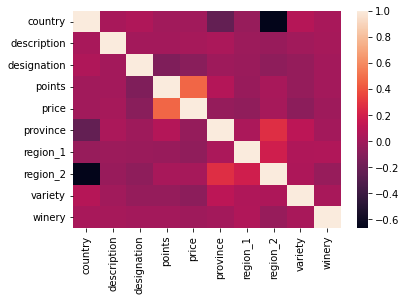

In [153]:
sns.heatmap(df_copy.corr())

In [154]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      137230 non-null  int32  
 1   description  137230 non-null  int32  
 2   designation  137230 non-null  int32  
 3   points       137230 non-null  int64  
 4   price        137230 non-null  float64
 5   province     137230 non-null  int32  
 6   region_1     137230 non-null  int32  
 7   region_2     137230 non-null  int32  
 8   variety      137230 non-null  int32  
 9   winery       137230 non-null  int32  
dtypes: float64(1), int32(8), int64(1)
memory usage: 7.3 MB


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1234)

In [157]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((96061, 9), (41169, 9), (96061,), (41169,))

In [158]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_predict=log.predict(X_test)
y_predict

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([87, 87, 87, ..., 87, 87, 87], dtype=int64)

In [159]:
accuracy_score(y_test,y_predict)*100

13.995967839879523

In [160]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([89, 88, 85, ..., 84, 85, 82], dtype=int64)

In [161]:
accuracy_score(y_test,y_predict)*100

22.504797298938524

In [162]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = SGDClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([93, 93, 93, ..., 93, 93, 93], dtype=int64)

In [163]:
accuracy_score(y_test,y_predict)*100

5.5162865262697665

In [164]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train,y_train)
y_predict = Rmodel.predict(X_test)
y_predict

array([92, 86, 90, ..., 90, 89, 88], dtype=int64)

In [165]:
accuracy_score(y_test,y_predict)*100

57.16437125021254

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predict= dt.predict(X_test)
y_predict

array([92, 87, 90, ..., 90, 89, 88], dtype=int64)

In [167]:
accuracy_score(y_test,y_predict)*100

55.580655347470184

In [168]:
import pickle
pickle.dump(log, open('WineReviews.pkl', 'wb'))

In [173]:
import pickle

def wine_review(features):
    
    pickled_model = pickle.load(open('WineReviews.pkl', 'rb'))
    review= str(round(list(pickled_model.predict([features]))[0]))
    
    return str("wine point "  + review)

In [174]:
import random
test_features  = list(X_test.iloc[random.randint(0,41170),:])
test_features

[42.0, 84373.0, 28343.0, 13.0, 51.0, 146.0, 0.0, 69.0, 6422.0]

In [175]:
wine_review(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'wine point 87'